# LG
# Day3 Lab : Deep learning applied to audio I (MLP, DNN, SPEECH MNIST, regularization)


# lab 3-1.   Logistic Regression 
 
 
*   a. Download haberman.data and Haberman.names from homepage. Read the data descriptions provided in Haberman.names Read haberman.data to your notebook session and plot the data using matplotlib.pyplot.scatter.


*   b. Fit a logistic regression model estimating the survival status. Plot the regression plane over the scatterplot of the data. Plot the change of the cost calculated by the cost function as the model fits. 

In [0]:
# downloads dataset and discription
!wget --no-check-certificate -qq 'https://docs.google.com/uc?export=download&id=1f1pfztgId_HaUfwCiHSx-66YCB_hvH8T' -O haberman.data
!wget --no-check-certificate -qq 'https://docs.google.com/uc?export=download&id=1Tvhlg04yDE9Aa6LBRTDBrGmY-JWr48bl' -O haberman.names

In [0]:
# check the dataset discription


'''

from "https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival"

Data Set Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

'''

In [0]:
f = open('haberman.data').readlines()
i = 0
for item in f:
  if i < 10:
    print(item)
    i+=1

30,64,1,1

30,62,3,1

30,65,0,1

31,59,2,1

31,65,4,1

33,58,10,1

33,60,0,1

34,59,0,2

34,66,9,2

34,58,30,1



In [0]:
all_data = []
for item in f:
  age, year, nodes, status = item[:-1].split(',')
  all_data.append([age, year, nodes, status])


In [0]:
all_data[0]

['30', '64', '1', '1']

In [0]:
import numpy as np 
all_data = np.asarray(all_data, dtype='int32')

In [0]:
np.shape(all_data)

(306, 4)

In [0]:
X = np.asarray(all_data[:,[0,1,2]])
y = np.asarray(all_data[:,-1])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

clf = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)
# clf.predict(X_test)
clf.score(X_test, y_test)

pred = clf.predict(X_test)
print('accurecy score: ', accuracy_score(pred, y_test))

accurecy score:  0.6451612903225806


In [0]:
# how about one-hot encoding

print('about age')
print('max :', np.max(all_data[:,0]))
print('min :', np.min(all_data[:,0]))
print('class : ', np.max(all_data[:,0]) - np.min(all_data[:,0]))

print('about year')
print('max :', np.max(all_data[:,1]))
print('min :', np.min(all_data[:,1]))
print('class : ', np.max(all_data[:,1]) - np.min(all_data[:,1]))

print('about nodes')
print('max :', np.max(all_data[:,2]))
print('min :', np.min(all_data[:,2]))
print('class : ', np.max(all_data[:,2]) - np.min(all_data[:,2]))

about age
max : 83
min : 30
class :  53
about year
max : 69
min : 58
class :  11
about nodes
max : 52
min : 0
class :  52


In [0]:
all_data_onehot = []
for item in all_data:
  age_onehot = np.eye(53+1)[item[0]-30]
  year_onehot = np.eye(11+1)[item[1]-58]
  nodes_onehot = np.eye(52+1)[item[2]-0]
  concat_data = np.concatenate((age_onehot, year_onehot, nodes_onehot), axis=-1)
  all_data_onehot.append(concat_data)

In [0]:
np.shape(all_data_onehot)

(306, 119)

In [0]:
all_data_onehot = np.asarray(all_data_onehot, dtype='int32')
X = all_data_onehot[:,:]
y = all_data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
# clf.predict(X_test)
clf.score(X_test, y_test)

0.6451612903225806

# lab 3-2 : GTZAN classification with meta data

class 시간에는 GTZAN 오디오 데이터 신호 자체를 바탕으로 CNN classifier를 만들고 훈련했습니다. 

여기서는 앞서 배운 logistic regression 을 이용해, 해당 음원으로 부터 뽑은 meta data만을 사용하여 장르를 분류하는 분류기를 만들어보고자 합니다.

In [0]:
# 데이터 다운로드

!wget --no-check-certificate -qq 'https://docs.google.com/uc?export=download&id=1vYHZUaQup_3lq33j0icKusrmeG8RumfQ' -O GTZAN_meta.csv

In [0]:
# 담겨있는 데이터 분석
# 1) 어떤 feature들이 포함되어있는가?
# 2) 어떤 형식으로 담겨있는가?

f = open('GTZAN_meta.csv').readlines()
i = 0 
for item in f:
  if i < 5:
    print(item)
    i += 1

filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label

blues.00081.au,103.359375,50,0.380260210341482,0.24826228618621826,2116.9429590051586,1956.6110562233207,4196.10796004257,0.12727247303115324,-26.929784696801033,107.33400763152126,-46.80999313926354,40.93263380897833,-21.463775815685374,24.81627494577181,-18.945571348278193,15.25345946194162,-15.050104081489566,12.26282276274354,-15.234049901082212,14.3366121677627,-13.82176876910632,7.562788734031475,-6.1813724929144716,0.3301650057813506,-6.829571234249954,0.9659217436842505,-7.570824746827891,2.9189869428522006,blues

blues.00022.au,95.703125,44,0.3064508714632783,0.11347541213035583,1156.0704963820428,1497.6681759683513,2170.053544649768,0.05861340218653251,-233.86077189794975,136.17023911175588,3.2894897462574204,48.931192700101434,8.6991060290

In [0]:
import numpy as np

attributes = f[0].split(',')
print(attributes)

all_data = []
all_label = []
for item in f[1:]:
  all_data.append(item[:-1].split(',')[1:-1])
  all_label.append(item[:-1].split(',')[-1])

['filename', 'tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label\n']


In [0]:
X = np.asarray(all_data, dtype='float32')
y = all_label

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

clf = LogisticRegression(random_state=0, max_iter = 5000).fit(X_train, y_train)
# clf.predict(X_test)
print('logisticRegression : ', clf.score(X_test, y_test))

logisticRegression :  0.54


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# how about another models
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6

이번엔 같은 모델을 Multi Layer Perceptron으로 만들어보겠습니다.


In [0]:
np.shape(X)

(1000, 28)

In [0]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

input_size = 28
hidden_neurons = 100
classes = 10


model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

In [0]:
y[:10]

['blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues']

In [0]:
all_genre = []
for item in y:
  if item not in all_genre:
    all_genre.append(item)

print(all_genre)
all_genre = np.asarray(all_genre)


y_class = []
for item in y:
  y_class.append(np.where(item==all_genre)[0][0])


print(y_class[-10:])


['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [0]:
Y = np_utils.to_categorical(y_class, classes)
print(Y[:10])
print(Y[-10:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
print(np.shape(X))
print(np.shape(Y))

(1000, 28)
(1000, 10)


In [0]:
# feature normalize 
X_norm = []
for i in range(np.shape(X)[1]):
  X_norm.append(X[:,i]/np.max(X[:,i]))

X_norm = np.asarray(X_norm)
X_norm = X_norm.T
print(np.shape(X_norm))


(1000, 28)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.1, random_state = 777)

In [0]:
hist = model.fit(X_train, Y_train, batch_size=128, epochs=200, validation_split=0.1, verbose=1)

Train on 810 samples, validate on 90 samples
Epoch 1/200
810/810 [==============================] - 0s 478us/step - loss: 2.2712 - acc: 0.1259 - val_loss: 2.2253 - val_acc: 0.1222
Epoch 2/200
810/810 [==============================] - 0s 40us/step - loss: 2.1313 - acc: 0.1815 - val_loss: 2.1237 - val_acc: 0.2000
Epoch 3/200
810/810 [==============================] - 0s 41us/step - loss: 2.0235 - acc: 0.3074 - val_loss: 2.0200 - val_acc: 0.2667
Epoch 4/200
810/810 [==============================] - 0s 46us/step - loss: 1.9176 - acc: 0.3568 - val_loss: 1.9509 - val_acc: 0.3000
Epoch 5/200
810/810 [==============================] - 0s 41us/step - loss: 1.8160 - acc: 0.3630 - val_loss: 1.8963 - val_acc: 0.2667
Epoch 6/200
810/810 [==============================] - 0s 44us/step - loss: 1.7260 - acc: 0.3716 - val_loss: 1.8259 - val_acc: 0.2778
Epoch 7/200
810/810 [==============================] - 0s 37us/step - loss: 1.6436 - acc: 0.4099 - val_loss: 1.7726 - val_acc: 0.3333
Epoch 8/200
810/

In [0]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 137us/step


[1.2423799133300781, 0.67]

In [0]:
# confusion matrix 확인
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 8  0  1  1  0  0  1  1  0  0]
 [ 0  9  0  0  0  0  0  0  0  1]
 [ 0  0  3  1  1  1  0  0  0  2]
 [ 1  0  0  4  0  0  0  1  0  1]
 [ 0  0  0  0  7  0  0  0  0  2]
 [ 1  1  0  1  0  5  0  0  1  0]
 [ 1  0  0  1  0  0  8  0  0  0]
 [ 0  0  0  1  0  0  0 10  0  0]
 [ 0  0  0  0  1  2  0  1  6  1]
 [ 2  0  1  2  0  0  1  0  0  7]]


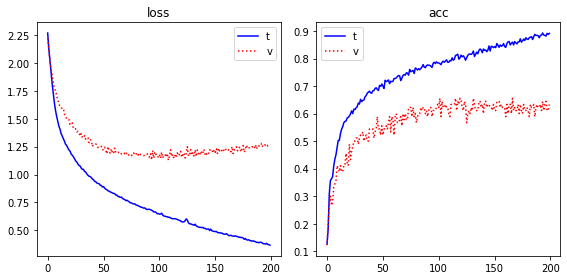

In [0]:
# loss 확인하기
import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t")
plt.plot(hist.history['val_loss'], 'r:', label="v")
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'r:', label="v")
plt.legend()
plt.tight_layout()
plt.show()

100/100 [==============================] - 0s 113us/step
model test accuracy :  [1.284188199043274, 0.66]
100/100 [==============================] - 0s 110us/step
model2 test accuracy :  [1.160339250564575, 0.68]


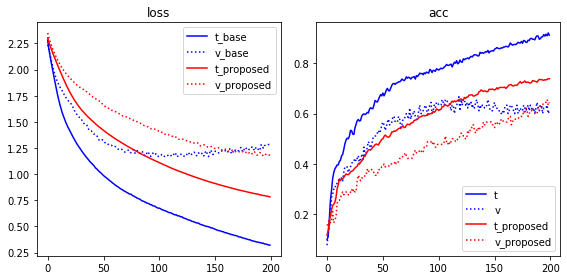

In [0]:
# overfitting 줄여보기1 - 네트워크 크기 줄여보기
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2



input_size = 28
hidden_neurons = 200
classes = 10

# baseline model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model test accuracy : ', model.evaluate(X_test, Y_test))

# improved model

input_size = 28
hidden_neurons = 50
classes = 10

model2 = Sequential()     
model2.add(Dense(hidden_neurons, input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dense(hidden_neurons))
model2.add(Activation('relu'))
model2.add(Dense(classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist2 = model2.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model2 test accuracy : ', model2.evaluate(X_test, Y_test))


import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'b:', label="v_base")

plt.plot(hist2.history['loss'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_loss'], 'r:', label="v_proposed")


plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'b:', label="v")

plt.plot(hist2.history['acc'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_acc'], 'r:', label="v_proposed")

plt.legend()
plt.tight_layout()
plt.show()

모델의 크기가 너무 작아서 training accuracy 가 오히려 잘 오르지 않습니다.

100/100 [==============================] - 0s 108us/step
model test accuracy :  [1.1691894102096558, 0.64]
100/100 [==============================] - 0s 130us/step
model2 test accuracy :  [1.6828179454803467, 0.65]


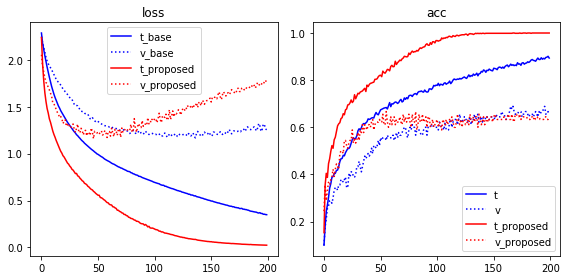

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2



input_size = 28
hidden_neurons = 200
classes = 10

# baseline model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model test accuracy : ', model.evaluate(X_test, Y_test))

# improved model

input_size = 28
hidden_neurons = 1000
classes = 10

model2 = Sequential()     
model2.add(Dense(hidden_neurons, input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dense(hidden_neurons))
model2.add(Activation('relu'))
model2.add(Dense(classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist2 = model2.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model2 test accuracy : ', model2.evaluate(X_test, Y_test))


import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'b:', label="v_base")

plt.plot(hist2.history['loss'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_loss'], 'r:', label="v_proposed")


plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'b:', label="v")

plt.plot(hist2.history['acc'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_acc'], 'r:', label="v_proposed")

plt.legend()
plt.tight_layout()
plt.show()

100/100 [==============================] - 0s 151us/step
model test accuracy :  [1.234390091896057, 0.64]
100/100 [==============================] - 0s 97us/step
model2 test accuracy :  [1.1069595575332642, 0.66]


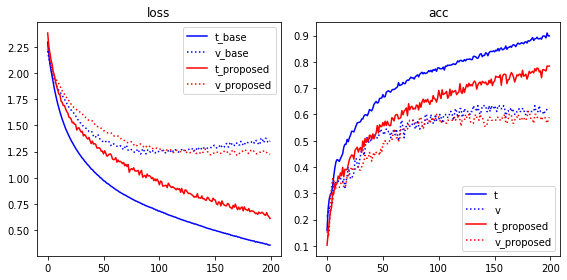

In [0]:
# overfitting 줄여보기3 - 원래 네트워크 크기에 dropout 추가하기
# overfitting 줄여보기4 - L2 norm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2

input_size = 28
hidden_neurons = 200
classes = 10

# baseline model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)


print('model test accuracy : ', model.evaluate(X_test, Y_test))

# improved model
input_size = 28
hidden_neurons = 200
classes = 10

model2 = Sequential()     
model2.add(Dense(hidden_neurons, input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dropout(0.3)) 
model2.add(Dense(hidden_neurons))
model2.add(Activation('relu'))
model2.add(Dropout(0.3)) 
model2.add(Dense(classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist2 = model2.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model2 test accuracy : ', model2.evaluate(X_test, Y_test))


import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'b:', label="v_base")

plt.plot(hist2.history['loss'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_loss'], 'r:', label="v_proposed")


plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'b:', label="v")

plt.plot(hist2.history['acc'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_acc'], 'r:', label="v_proposed")

plt.legend()
plt.tight_layout()
plt.show()

100/100 [==============================] - 0s 134us/step
model test accuracy :  [1.2348582434654236, 0.66]
100/100 [==============================] - 0s 122us/step
model2 test accuracy :  [1.3447735738754272, 0.69]


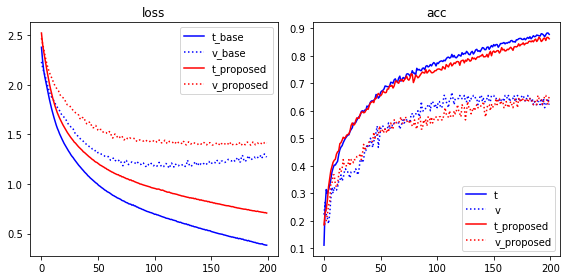

In [0]:
# overfitting 줄여보기4 - L2 norm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2

input_size = 28
hidden_neurons = 200
classes = 10

# baseline model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model test accuracy : ', model.evaluate(X_test, Y_test))

# improved model

input_size = 28
hidden_neurons = 200
classes = 10

model2 = Sequential()     
model2.add(Dense(hidden_neurons, kernel_regularizer=l2(0.001), input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dense(hidden_neurons, kernel_regularizer=l2(0.001)))
model2.add(Activation('relu'))
model2.add(Dense(classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist2 = model2.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model2 test accuracy : ', model2.evaluate(X_test, Y_test))


import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'b:', label="v_base")

plt.plot(hist2.history['loss'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_loss'], 'r:', label="v_proposed")


plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'b:', label="v")

plt.plot(hist2.history['acc'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_acc'], 'r:', label="v_proposed")

plt.legend()
plt.tight_layout()
plt.show()

100/100 [==============================] - 0s 152us/step
model test accuracy :  [1.1373755526542664, 0.66]
Epoch 00169: early stopping
100/100 [==============================] - 0s 126us/step
model2 test accuracy :  [1.1661386489868164, 0.7]


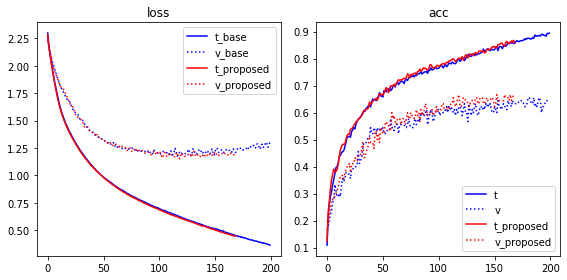

In [0]:
# overfitting 줄여보기5 - early stopping
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.callbacks import EarlyStopping



input_size = 28
hidden_neurons = 200
classes = 10

# baseline model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model test accuracy : ', model.evaluate(X_test, Y_test))

# improved model

input_size = 28
hidden_neurons = 200
classes = 10

model2 = Sequential()     
model2.add(Dense(hidden_neurons, input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dense(hidden_neurons))
model2.add(Activation('relu'))
model2.add(Dense(classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=50)

hist2 = model2.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0, callbacks=[es])

print('model2 test accuracy : ', model2.evaluate(X_test, Y_test))


import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'b:', label="v_base")

plt.plot(hist2.history['loss'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_loss'], 'r:', label="v_proposed")


plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'b:', label="v")

plt.plot(hist2.history['acc'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_acc'], 'r:', label="v_proposed")

plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# overfitting 줄여보기 6 - feature selection

print(attributes)
selected = np.asarray([1,2,4,5,6,7,8])-1

['filename', 'tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label\n']


100/100 [==============================] - 0s 122us/step
model test accuracy :  [1.2283924150466918, 0.68]
['filename', 'tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label\n']
100/100 [==============================] - 0s 102us/step
model2 test accuracy :  [1.6732114839553833, 0.43]


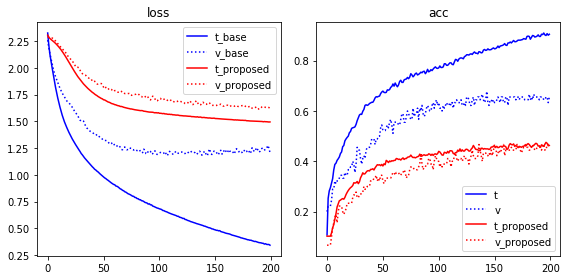

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.callbacks import EarlyStopping



input_size = 28
hidden_neurons = 200
classes = 10

# baseline model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model test accuracy : ', model.evaluate(X_test, Y_test))

# improved model
attributes
print(attributes)

input_size = 7
hidden_neurons = 200
classes = 10

model2 = Sequential()     
model2.add(Dense(hidden_neurons, input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dense(hidden_neurons))
model2.add(Activation('relu'))
model2.add(Dense(classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')


hist2 = model2.fit(X_train[:,selected], Y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=0)

print('model2 test accuracy : ', model2.evaluate(X_test[:,selected], Y_test))


import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'b:', label="v_base")

plt.plot(hist2.history['loss'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_loss'], 'r:', label="v_proposed")


plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'b:', label="v")

plt.plot(hist2.history['acc'], 'r-', label="t_proposed")
plt.plot(hist2.history['val_acc'], 'r:', label="v_proposed")

plt.legend()
plt.tight_layout()
plt.show()

# lab 3-3 : urban sound detection

도시 소음 감지 모델 설계. 데이터셋에는 총 5개의 클래스가 있으며, Carhorn(경적), glass(유리 파손), gunshot(총), scream(비명), siren(사이렌) 각각의 클래스별로 300개 씩의 데이터가 있습니다.

In [0]:
# 데이터셋 다운로드

!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vCd_tM9Ljp9z2o3lj9sfLsCVR2lgh80g' -O urban_sound_8k.zip
!mkdir urban_sound_8k
!unzip -qq /content/urban_sound_8k.zip -d ./urban_sound_8k 

warning [/content/urban_sound_8k.zip]:  402664 extra bytes at beginning or within zipfile
  (attempting to process anyway)


In [0]:
import librosa
import IPython.display as ipd

# 먼저 학습 데이터를 찬찬히 둘러보겠습니다. urban_sound_8k 폴더에 Urbansound8K/wav 폴더 속에 어떠한 파일들이 있는지 둘러보시고, 그 중 하나를 불러와 소리를 들어본 다음 mel spectrogram을 확인해보세요.

# 오디오 경로 지정
# 왼쪽 파일 탭에서 경로 지정을 원하는 파일을 우클릭 한다음 경로 복사(copy path)를 한 다음 붙여넣기 하면 쉽게 경로를 얻을 수 있습니다
audio_path = '''코드'''
audio_path = '/'

# 오디오 불러오기
audio, sr = '''코드'''

#오디오 들어보기
ipd.Audio('''코드''')

In [0]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

#mel spectrogram
mel = '''코드'''
plt.figure(figsize=(4,4))
librosa.display.specshow('''코드''')
plt.show()

In [0]:
list = []
labels = ['carhorn', 'glass', 'gunshot', 'scream', 'siren']
for label in labels:
  # 각각의 클래스를 대표하는 오디오 하나씩만을 load해보기
  temp, sr = '''코드'''
  list.append(temp)

for index,item in enumerate(list):
  mel = '''코드'''
  plt.subplot(1,5, index+1)
  plt.gca().set_title(labels[index])
  plt.xticks([])
  plt.yticks([])
  librosa.display.specshow('''코드''')

In [0]:
# 학습 데이터 전처리

import glob
path = '''코드'''
audio_files = '''코드'''
print('데이터의 총 개수는 :', len(audio_files))

In [0]:
labels = ['carhorn','glass','gunshot','scream','siren']
audio_data = []
class_label = []

for item in audio_files:
  #오디오 데이터 불러오기
  audio = np.load('''코드''')
  audio_data.append('''코드''')
  
  #클래스 레이블 불러오기
  label = '''코드'''
  class_label.append('''코드''')

In [0]:
# 가장 긴 길이의 오디오를 찾는다.
length = []
for item in audio_data:
	length.append('''코드''') #for문을 돌려서 모든 데이터의 길이를 length라는 리스트 안에 저장합니다

max_length = np.max(length) # length라는 리스트 안에서 가장 긴 오디오의 길이를 리턴합니다
print('가장 긴 오디오의 길이는 :',max_length/16000,'seconds')

In [0]:
# 임의의 오디오를 특정 길이가 되도록 padding 하는 함수
def pad_audio(audio):
	length = len(audio)
	return np.concatenate((audio, np.zeros((max_length-length))))

In [0]:
X_all = []
for item in audio_data:
  # audio_data를 패딩하기
	padded_audio = '''코드'''
  
  # 패딩된 오디오에 맞춰 mel spectrogram 추출
	mel = librosa.feature.melspectrogram('''코드''')
  # mel spectrogram을 log scale로 변형
	log_mel = np.log(mel+1e-3)
  
  # X_all 리스트에 mel-spectrogram 집어넣기
	X_all.append('''코드''')

In [0]:
# 정답 label 생성
y_all = []
for item in class_label:
  y_all.append('''코드''')

In [0]:
# train - test data split
X_all = np.asarray(X_all)
y_all = np.asarray(y_all)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = '''코드'''


In [0]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,pooling, Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


#앞선 튜토리얼 코드를 참고하여 여러분들이 직접 모델을 설계해보세요!
#한가지 주의할 점이 있다면 이번 모델의 경우는 마지막 dense layer(output layer)의 유닛 개수가 5개여야 한다는 점입니다.
#레이어를 깊게 쌓는다고 무조건 성능이 좋아지지 않습니다!

model = Sequential()


In [0]:
# Adam optimizer를 학습에 이용하겠습니다. 원하신다면 lr(learning rate)를 조정하셔도 좋습니다.
opt = Adam(lr=0.002)
#해당 모델에 어떤 loss를 줄 것인지와 바로 위에서 정한 optimizer를 함수의 인자로 넣어주세요.
model.compile('''코드''')

In [0]:
#학습을 시작하기 전에 설계한 모델의 정보를 확인해 봅시다
model.summary()

In [0]:
hist = model.fit('''코드''')

In [0]:
score = model.evaluate('''코드''')
print('Test accuracy :', '''코드''')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax('''코드''')
y_gt = np.argmax('''코드''')

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(5)
plt.xticks(tick_marks, ['carhorn','glass','gunshot','scream','siren'], rotation=45)
plt.yticks(tick_marks, ['carhorn','glass','gunshot','scream','siren'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()

# lab 3-4 : Speech MNIST model search



In [0]:
# wave --> numpy speech mnist dataset download
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
!mkdir speech_mnist
!unzip -qq /content/recordings_npy.zip -d ./speech_mnist 

In [0]:
import librosa
import numpy as np 
import glob
speech_mnist_npy = sorted(glob.glob('./speech_mnist/*.npy'))

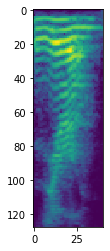

In [0]:
temp = np.load(speech_mnist_npy[0])
mel = librosa.feature.melspectrogram(y=temp, sr = 8000, n_fft=512, hop_length=128)
plt.imshow(np.log(mel+1e-5))

In [0]:
all_MEL = []
all_label = []

for item in speech_mnist_npy:
  temp = np.load(item)
  mel = librosa.feature.melspectrogram(y=temp, sr = 8000, n_fft=512, hop_length=128)
  mel_norm = mel/np.max(mel)
  mel_log = np.log(mel_norm+1e-5)
  all_MEL.append(mel_log)

  label = np.eye(10)[(int)(item.split('/')[-1].split('_')[0])]
  all_label.append(label)


print(all_MEL)
print(all_label)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       [-10.38992279, -10.39110695, -10.66097555, ..., -11.43230129,
        -11.43191875, -11.3112495 ],
       [-10.78592405, -10.86284885, -10.7094745 , ..., -11.39894047,
        -11.46593624, -11.29784493],
       [-11.35866158, -10.86538966, -10.66342324, ..., -11.35189495,
        -11.32756447, -11.3418306 ]]), array([[-11.50310206, -11.48917739, -11.46579678, ..., -11.50238856,
        -11.43161407, -11.44030868],
       [-11.51069853, -11.51154726, -11.51025024, ..., -11.32859791,
        -11.2332926 , -11.27091588],
       [-11.50953917, -11.50338184, -11.50403341, ..., -11.27069399,
        -11.23743451, -10.50664047],
       ...,
       [-11.45419939, -11.45267229, -11.40019946, ..., -11.37911797,
        -11.48641415, -11.47328479],
       [-11.46941999, -11.4508171 , -11.42928825, ..., -11.4029689 ,
        -11.43314293, -11.48392907],
       [-11.43975496, -11.41469734, -11.4045291 , ..., -11.45851983,
        -11.42973874, -11.4820589

In [0]:
np.shape(all_MEL[0])

(128, 41)

In [0]:
all_length = []
for item in all_MEL:
  all_length.append(np.shape(item)[1])


max_length = np.max(all_length)

def pad(mel, max_length):
  if np.shape(mel)[1] >= max_length:
    return mel[:,:max_length]
  else :
    pad_length = max_length-np.shape(mel)[1]
    return np.concatenate((item, np.zeros((128, pad_length))), axis=1)


X = []
for item in all_MEL:
  X.append(pad(item, max_length))


X = np.asarray(np.expand_dims(X, axis=-1))
Y = np.asarray(all_label)


print(np.shape(X))
print(np.shape(Y))

(2000, 128, 143, 1)
(2000, 10)


# Conv2D Classifier

In [0]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,pooling
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(128,143,1)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(pooling.AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=777)
hist = model.fit(X_train, Y_train, validation_split=0.1, verbose=1, epochs=20, batch_size=32)

Train on 1620 samples, validate on 180 samples
Epoch 1/20
1620/1620 [==============================] - 15s 9ms/step - loss: 2.2210 - acc: 0.2037 - val_loss: 1.9077 - val_acc: 0.3167
Epoch 2/20
1620/1620 [==============================] - 3s 2ms/step - loss: 1.6753 - acc: 0.4056 - val_loss: 1.4900 - val_acc: 0.4833
Epoch 3/20
1620/1620 [==============================] - 3s 2ms/step - loss: 1.2706 - acc: 0.5432 - val_loss: 1.3128 - val_acc: 0.5056
Epoch 4/20
1620/1620 [==============================] - 3s 2ms/step - loss: 0.9799 - acc: 0.6469 - val_loss: 1.0205 - val_acc: 0.5889
Epoch 5/20
1620/1620 [==============================] - 3s 2ms/step - loss: 0.8313 - acc: 0.7062 - val_loss: 1.0122 - val_acc: 0.6222
Epoch 6/20
1620/1620 [==============================] - 3s 2ms/step - loss: 0.6565 - acc: 0.7667 - val_loss: 0.8766 - val_acc: 0.6778
Epoch 7/20
1620/1620 [==============================] - 3s 2ms/step - loss: 0.5415 - acc: 0.8130 - val_loss: 0.6903 - val_acc: 0.7722
Epoch 8/20
162

In [0]:
model.evaluate(X_test, Y_test)

200/200 [==============================] - 0s 1ms/step


[0.35402029037475585, 0.885]

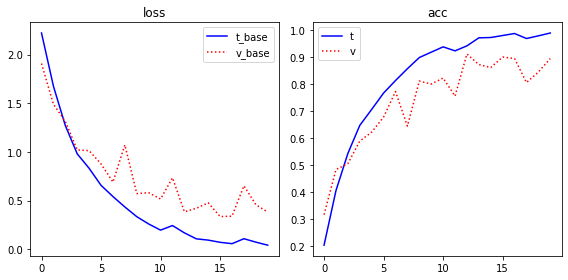

In [0]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'r:', label="v_base")

plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'r:', label="v")

plt.legend()
plt.tight_layout()
plt.show()

# Conv1D classifier

In [0]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv1D, BatchNormalization,pooling
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(128,143)))
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(pooling.AveragePooling1D(pool_size=2))

model.add(Flatten())
 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


X_train, X_test, Y_train, Y_test = train_test_split(X[:,:,:,0], Y, test_size=0.1, random_state=777)
hist = model.fit(X_train, Y_train, validation_split=0.1, verbose=1, epochs=20, batch_size=32)

Train on 1620 samples, validate on 180 samples
Epoch 1/20
1620/1620 [==============================] - 9s 6ms/step - loss: 1.8283 - acc: 0.3679 - val_loss: 1.3420 - val_acc: 0.5944
Epoch 2/20
1620/1620 [==============================] - 1s 787us/step - loss: 0.9980 - acc: 0.6870 - val_loss: 0.8794 - val_acc: 0.6889
Epoch 3/20
1620/1620 [==============================] - 1s 909us/step - loss: 0.5978 - acc: 0.8235 - val_loss: 0.6235 - val_acc: 0.8167
Epoch 4/20
1620/1620 [==============================] - 1s 780us/step - loss: 0.3807 - acc: 0.8914 - val_loss: 0.4668 - val_acc: 0.8556
Epoch 5/20
1620/1620 [==============================] - 1s 761us/step - loss: 0.2762 - acc: 0.9123 - val_loss: 0.3879 - val_acc: 0.8833
Epoch 6/20
1620/1620 [==============================] - 1s 790us/step - loss: 0.2158 - acc: 0.9333 - val_loss: 0.3850 - val_acc: 0.8611
Epoch 7/20
1620/1620 [==============================] - 1s 743us/step - loss: 0.1580 - acc: 0.9537 - val_loss: 0.2578 - val_acc: 0.9222
Epo

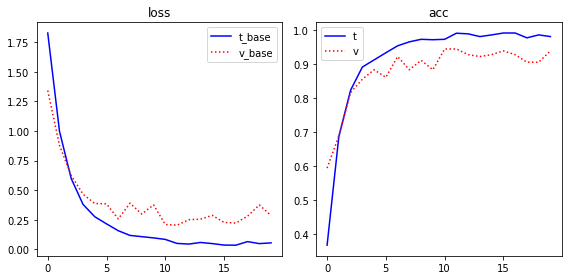

In [0]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'r:', label="v_base")

plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'r:', label="v")

plt.legend()
plt.tight_layout()
plt.show()

In [0]:
model.evaluate(X_test, Y_test)

200/200 [==============================] - 0s 778us/step


[0.19888612806797026, 0.935]

# C2dRNN Classifier

In [0]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,pooling,Reshape
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(128,143,1)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,2)))

print(model.output)

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Reshape((16, 17*32)))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LSTM(100))
          

 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))



model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=777)
hist = model.fit(X_train, Y_train, validation_split=0.1, verbose=1, epochs=20, batch_size=32)


Tensor("max_pooling2d_26/MaxPool:0", shape=(?, 16, 17, 32), dtype=float32)
Train on 1620 samples, validate on 180 samples
Epoch 1/20
1620/1620 [==============================] - 17s 11ms/step - loss: 2.1654 - acc: 0.1963 - val_loss: 2.1618 - val_acc: 0.1667
Epoch 2/20
1620/1620 [==============================] - 7s 4ms/step - loss: 1.8261 - acc: 0.3395 - val_loss: 1.8360 - val_acc: 0.3167
Epoch 3/20
1620/1620 [==============================] - 6s 4ms/step - loss: 1.4495 - acc: 0.4426 - val_loss: 1.8035 - val_acc: 0.3500
Epoch 4/20
1620/1620 [==============================] - 7s 4ms/step - loss: 1.2480 - acc: 0.5395 - val_loss: 1.3518 - val_acc: 0.4944
Epoch 5/20
1620/1620 [==============================] - 7s 4ms/step - loss: 1.0631 - acc: 0.6099 - val_loss: 1.1513 - val_acc: 0.5833
Epoch 6/20
1620/1620 [==============================] - 7s 4ms/step - loss: 0.9036 - acc: 0.6722 - val_loss: 1.0611 - val_acc: 0.5778
Epoch 7/20
1620/1620 [==============================] - 7s 4ms/step - lo

200/200 [==============================] - 0s 2ms/step
[1.0267918586730957, 0.66]


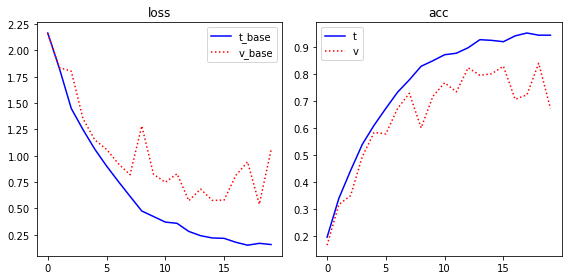

In [0]:
print(model.evaluate(X_test, Y_test))

import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'r:', label="v_base")

plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'r:', label="v")

plt.legend()
plt.tight_layout()
plt.show()

# C1dRNN Classifier

In [0]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv1D, BatchNormalization,pooling, LSTM
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(128,143)))
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))


model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LSTM(100))
          

 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))



model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


X_train, X_test, Y_train, Y_test = train_test_split(X[:,:,:,0], Y, test_size=0.1, random_state=777)
hist = model.fit(X_train, Y_train, validation_split=0.1, verbose=1, epochs=20, batch_size=32)






Train on 1620 samples, validate on 180 samples
Epoch 1/20
1620/1620 [==============================] - 15s 9ms/step - loss: 1.8927 - acc: 0.3315 - val_loss: 1.8686 - val_acc: 0.2722
Epoch 2/20
1620/1620 [==============================] - 4s 3ms/step - loss: 1.1400 - acc: 0.5957 - val_loss: 1.0366 - val_acc: 0.6667
Epoch 3/20
1620/1620 [==============================] - 4s 3ms/step - loss: 0.7789 - acc: 0.7198 - val_loss: 0.8126 - val_acc: 0.7333
Epoch 4/20
1620/1620 [==============================] - 5s 3ms/step - loss: 0.5898 - acc: 0.8000 - val_loss: 0.7404 - val_acc: 0.7056
Epoch 5/20
1620/1620 [==============================] - 4s 3ms/step - loss: 0.5197 - acc: 0.8179 - val_loss: 0.5919 - val_acc: 0.8056
Epoch 6/20
1620/1620 [==============================] - 4s 3ms/step - loss: 0.4238 - acc: 0.8556 - val_loss: 0.5315 - val_acc: 0.8111
Epoch 7/20
1620/1620 [==============================] - 5s 3ms/step - loss: 0.3717 - acc: 0.8747 - val_loss: 0.5989 - val_acc: 0.8056
Epoch 8/20
162

200/200 [==============================] - 0s 1ms/step
[0.3469201385974884, 0.895]


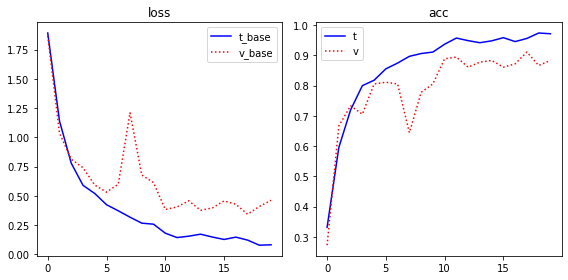

In [0]:
print(model.evaluate(X_test, Y_test))

import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t_base")
plt.plot(hist.history['val_loss'], 'r:', label="v_base")

plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'r:', label="v")

plt.legend()
plt.tight_layout()
plt.show()

# whole model structure template


In [0]:
''' 

1. 학습 데이터 전처리 
2. 모델 설계 
3. 모델 훈련
4. test 성능 평가 

'''

In [0]:
# 1. 학습 데이터 전처리

def preprocessing(wav_path):

  ''' code here '''

  return X, Y


# # example
# def preprocessing(wav_path):
#   X_temp = []
#   Y = []
#   for item in wav_path:
#     audio, sr = librosa.load(item)
#     melspectrogram = librosa.feature.melspectrogram(audio, sr, n_fft, hop_length)
#     X.append(mel_spectrogram)

#     label = np.eye(classes)[(int)(item.split('/')[-1].split('_')[0])]
#     Y.append(label)
  
#   # max_length_padding
#   all_length = [] 
#   for item in X:
#     all_length.append(np.shape(item)[1])
#   max_length = np.max(all_length)

#   X = []
#   for item in X_temp:
#     X.append(pad(item, max_length))

#   X = np.asarray(X)
#   Y = np.asarray(Y)
#   return X, Y


In [0]:
# 2. 모델 설계 

def build_model():

  ''' code here '''

  return model

# # example
# def build_model():
#   model = Sequential()
#   model.add(BatchNormalization(input_shape=(128,143)))
#   model.add(Activation('relu'))
#   model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
#   model.add(BatchNormalization())
#   model.add(Activation('relu'))
#   model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
#   model.add(pooling.MaxPooling1D(pool_size=2))
#   model.add(pooling.MaxPooling1D(pool_size=2))
#   model.add(pooling.AveragePooling1D(pool_size=2))
#   model.add(Flatten())
#   model.add(Dense(32, activation='relu'))
#   model.add(Dense(10, activation='softmax'))
#   return model

In [0]:
# 3. 훈련

def train(model, X, Y):

  ''' code here '''

  return hist


# # example
# def train(model, X, Y):
#   X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=777)
#   model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#   hist = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0, validation_split=0.1)
#   return hist


In [0]:
# 3. 평가 및 분석

def evaluate(model, X, Y):

  ''' code here '''

  return hist


# # example
# def evaluate(model, X, Y):
#   X_train, X_test, Y_train, Y_test = train_test_split(X[:,:,:,0], Y, test_size=0.1, random_state=777)
#   print(model.evaluate(X_test, Y_test))

In [0]:
# main 

wav_path = sorted(glob.glob('./speech_mnist/*.npy'))
X, Y = preprocessing(wav_path)
model = build_model()
train(model, X, Y)
evaluate(model, X, Y)

200/200 [==============================] - 0s 258us/step
[0.09708583652973175, 0.98]
